In [2]:
#importing libraries

import pandas as pd
import numpy as np
import seaborn as sns 

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create.


In [3]:
df = pd.read_csv(r'C:\Users\asus\Dropbox\My PC (PawanKhandelwal)\Desktop\movies.csv')

In [4]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [5]:
df.tail()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,NaN,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,NaN,NaN,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,NaN,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,NaN,NaN,120.0
7667,Tee em el,NaN,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,NaN,NaN,PK 65 Films,102.0


In [6]:
#Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing)))


name - 0%
rating - 0%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 0%
gross - 0%
company - 0%
runtime - 0%


In [7]:
#data types for columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
#changing data types

df = df.fillna(0)
df.budget = df.budget.astype(int)
df.gross = df.gross.astype(int)

In [9]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int32
gross         int32
company      object
runtime     float64
dtype: object

In [10]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0


In [11]:
#creating the correct year column 

#df["correctYear"] = df["released"].astype(str).str[9:13]
#df.head()

In [12]:
df = df.sort_values(by=['gross'], inplace = False, ascending = False)
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5033,Loving Annabelle,Not Rated,Drama,2006,"May 24, 2007 (Germany)",6.3,12000.0,Katherine Brooks,Katherine Brooks,Erin Kelly,United States,1000000,0,Big Easy Pictures,77.0
7667,Tee em el,0,Horror,2020,"August 19, 2020 (United States)",5.7,7.0,Pereko Mosia,Pereko Mosia,Siyabonga Mabaso,South Africa,0,0,PK 65 Films,102.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,-2147483648,Twentieth Century Fox,194.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,-2147483648,Marvel Studios,181.0


In [35]:
#for full display of dataframe

pd.set_option('display.max_rows', None)

In [27]:
#dropping duplicates

df.company = df.company.astype('object')
#df.company.drop_duplicates().sort_values(ascending = False)

In [15]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118.0
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124.0
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143.0


In [16]:
#various correlations
#1. budget high
#2. company high

<function matplotlib.pyplot.show(close=None, block=None)>

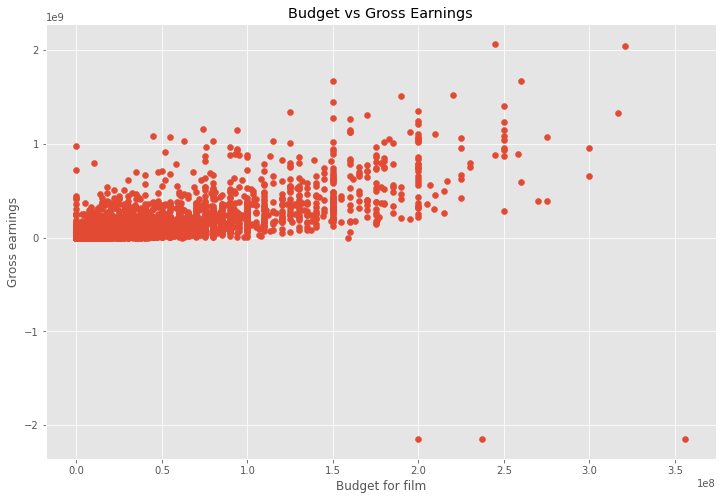

In [17]:
#creating a scatter plot 

plt.scatter(x= df['budget'], y= df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for film')
plt.ylabel('Gross earnings')
plt.show

<AxesSubplot:xlabel='budget', ylabel='gross'>

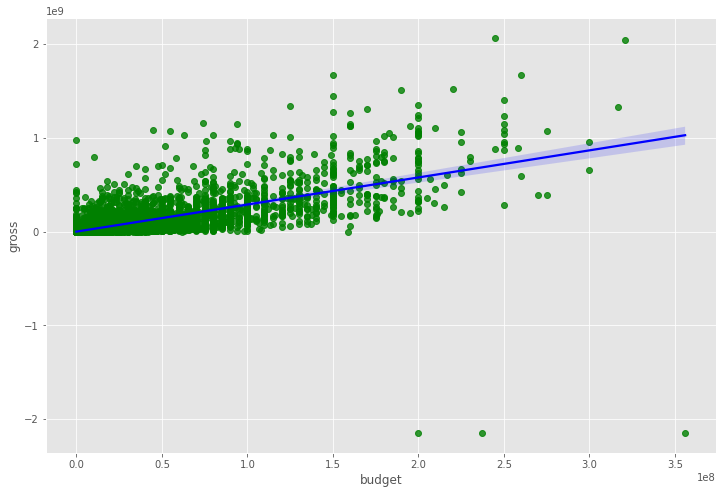

In [18]:
#using seabor to plot same graph

sns.regplot(x='budget', y='gross', data = df, scatter_kws={'color': 'green'}, line_kws={'color': 'blue'})

In [19]:
df.corr()

,year,score,votes,budget,gross,runtime
year,1.000000,0.092616,0.222427,0.309212,0.256331,0.116358
score,0.092616,1.000000,0.407101,0.056863,0.169154,0.394564
votes,0.222427,0.407101,1.000000,0.486931,0.573930,0.306984
budget,0.309212,0.056863,0.486931,1.000000,0.687124,0.268372
gross,0.256331,0.169154,0.573930,0.687124,1.000000,0.203616
runtime,0.116358,0.394564,0.306984,0.268372,0.203616,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

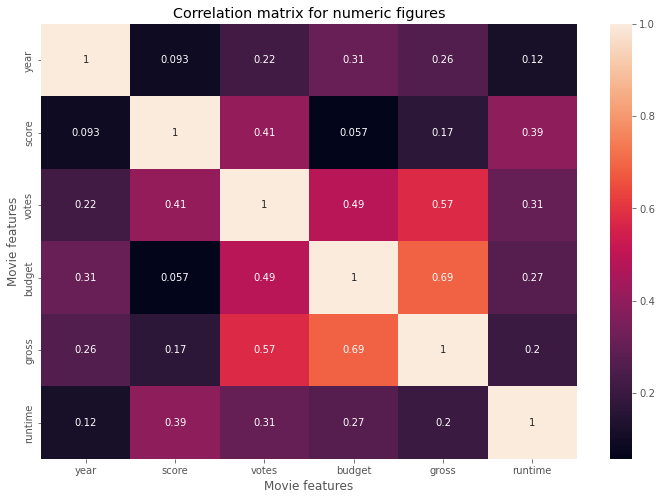

In [20]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation matrix for numeric figures')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show

In [29]:
#converting df into numerical data using for loop

df_numerise = df

for col_name in df_numerise.columns:
    if(df_numerise[col_name].dtype == 'object' ):
        df_numerise[col_name] = df_numerise[col_name].astype('category')
        df_numerise[col_name] = df_numerise[col_name].cat.codes
        
df_numerise.head()       

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
6663,5144,6,0,2015,699,7.8,876000.0,1125,2551,525,56,245000000,2069521700,1541,138.0
7244,536,6,0,2018,193,8.4,897000.0,162,744,2242,56,321000000,2048359754,1607,149.0
7480,6194,5,2,2019,1489,6.9,222000.0,1455,1920,677,56,260000000,1670727580,2317,118.0
6653,2969,6,0,2015,1705,7.0,593000.0,517,3569,438,56,150000000,1670516444,2282,124.0
6043,5502,6,0,2012,2473,8.0,1300000.0,1517,2315,2242,56,220000000,1518815515,1607,143.0


In [31]:
df_numerise.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.016377,0.013038,0.009079,0.009081,0.006472,-0.010737,0.020548,0.013895,0.009212,0.008483
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,0.006192,0.033743,0.019483,-0.005921,0.013405,0.081244,-0.081939,-0.095355,-0.032954,0.064133
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027384,-0.145296,-0.015258,0.006567,-0.005477,-0.037615,-0.334021,-0.229534,-0.071066,-0.052914
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.092616,0.222427,-0.020795,-0.008656,-0.027242,-0.070938,0.309212,0.256331,-0.010433,0.116358
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.039814,0.015878,-0.001478,-0.002404,0.015777,-0.020427,0.009145,0.014154,-0.010471,0.004852
score,0.016377,0.006192,0.027384,0.092616,0.039814,1.000000,0.407101,0.010568,0.022098,-0.000026,-0.133346,0.056863,0.169154,0.005067,0.394564
votes,0.013038,0.033743,-0.145296,0.222427,0.015878,0.407101,1.000000,0.000349,0.001127,-0.019146,0.073525,0.486931,0.573930,0.133455,0.306984
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.010568,0.000349,1.000000,0.299067,0.039234,0.017490,0.004976,-0.005615,0.004404,0.017062
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.022098,0.001127,0.299067,1.000000,0.027245,0.015343,-0.025911,-0.015602,0.005644,-0.004036
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.000026,-0.019146,0.039234,0.027245,1.000000,-0.012998,-0.019952,-0.010628,0.012437,0.009418


<function matplotlib.pyplot.show(close=None, block=None)>

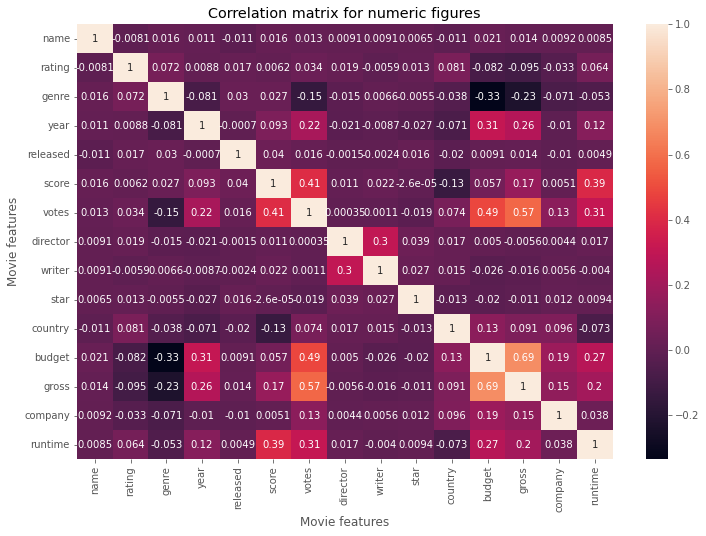

In [32]:
correlation_mat = df_numerise.corr()
sns.heatmap(correlation_mat, annot = True)
plt.title('Correlation matrix for numeric figures')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show

In [37]:
#using unstack 

correlation_mat = df_numerise.corr()
correlation_pairs = correlation_mat.unstack()
correlation_pairs

name      name        1.000000
          rating     -0.008069
          genre       0.016355
          year        0.011453
          released   -0.011311
          score       0.016377
          votes       0.013038
          director    0.009079
          writer      0.009081
          star        0.006472
          country    -0.010737
          budget      0.020548
          gross       0.013895
          company     0.009212
          runtime     0.008483
rating    name       -0.008069
          rating      1.000000
          genre       0.072423
          year        0.008779
          released    0.016613
          score       0.006192
          votes       0.033743
          director    0.019483
          writer     -0.005921
          star        0.013405
          country     0.081244
          budget     -0.081939
          gross      -0.095355
          company    -0.032954
          runtime     0.064133
genre     name        0.016355
          rating      0.072423
        

In [36]:
#using sort with unstack

sorted_pairs = correlation_pairs.sort_values()
sorted_pairs

genre     budget     -0.334021
budget    genre      -0.334021
genre     gross      -0.229534
gross     genre      -0.229534
genre     votes      -0.145296
votes     genre      -0.145296
country   score      -0.133346
score     country    -0.133346
gross     rating     -0.095355
rating    gross      -0.095355
budget    rating     -0.081939
rating    budget     -0.081939
genre     year       -0.081261
year      genre      -0.081261
runtime   country    -0.073319
country   runtime    -0.073319
genre     company    -0.071066
company   genre      -0.071066
country   year       -0.070938
year      country    -0.070938
genre     runtime    -0.052914
runtime   genre      -0.052914
genre     country    -0.037615
country   genre      -0.037615
company   rating     -0.032954
rating    company    -0.032954
year      star       -0.027242
star      year       -0.027242
budget    writer     -0.025911
writer    budget     -0.025911
year      director   -0.020795
director  year       -0.020795
released

In [39]:
high_corr = sorted_pairs[(sorted_pairs)>0.5]
high_corr

gross     votes       0.573930
votes     gross       0.573930
budget    gross       0.687124
gross     budget      0.687124
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [ ]:
#votes and budget have the hifhest correlation with gross